In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats

%matplotlib inline

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
#Only need to run this lambda on columns with scientific notation only, 
# not on bathrooms or bedrooms because we do need to know if a house has 2.5 bathrooms/bedrooms

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.shape

(21597, 21)

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,Average,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,Average,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,Average,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,Average,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
numbers = df.select_dtypes(np.number)
numbers

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.00,3,1.00,1180,5650,1.00,1180,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,538000.00,3,2.25,2570,7242,2.00,2170,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,180000.00,2,1.00,770,10000,1.00,770,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,604000.00,4,3.00,1960,5000,1.00,1050,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,510000.00,3,2.00,1680,8080,1.00,1680,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.00,3,2.50,1530,1131,3.00,1530,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,400000.00,4,2.50,2310,5813,2.00,2310,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,402101.00,2,0.75,1020,1350,2.00,1020,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,400000.00,3,2.50,1600,2388,2.00,1600,2004,0.00,98027,47.53,-122.07,1410,1287


In [9]:
df[['bathrooms']].info

<bound method DataFrame.info of        bathrooms
0           1.00
1           2.25
2           1.00
3           3.00
4           2.00
...          ...
21592       2.50
21593       2.50
21594       0.75
21595       2.50
21596       0.75

[21597 rows x 1 columns]>

In [10]:
df[['bathrooms']].head(25)

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00
5,4.50
6,2.25
7,1.50
8,1.00
9,2.50


In [11]:
df[['yr_renovated']].value_counts()

yr_renovated
0.00            17011
2014.00            73
2003.00            31
2013.00            31
2007.00            30
                ...  
1951.00             1
1953.00             1
1954.00             1
1971.00             1
1959.00             1
Length: 70, dtype: int64

In [12]:
df[['grade']].value_counts()

grade        
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
dtype: int64

In [13]:
df[['date']].head()

,date
0,10/13/2014
1,12/9/2014
2,2/25/2015
3,12/9/2014
4,2/18/2015


In [14]:
df[['date']].value_counts()

date     
6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
8/30/2014      1
1/31/2015      1
8/3/2014       1
11/2/2014      1
1/10/2015      1
Length: 372, dtype: int64

In [15]:
df[['date']].info

<bound method DataFrame.info of              date
0      10/13/2014
1       12/9/2014
2       2/25/2015
3       12/9/2014
4       2/18/2015
...           ...
21592   5/21/2014
21593   2/23/2015
21594   6/23/2014
21595   1/16/2015
21596  10/15/2014

[21597 rows x 1 columns]>

In [16]:
df_2 = numbers.drop(['id', 'lat', 'long', 'zipcode'], axis = 1)

<ipython-input-17-e71255978ee3>:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('heat.png',bbox = 'tight')


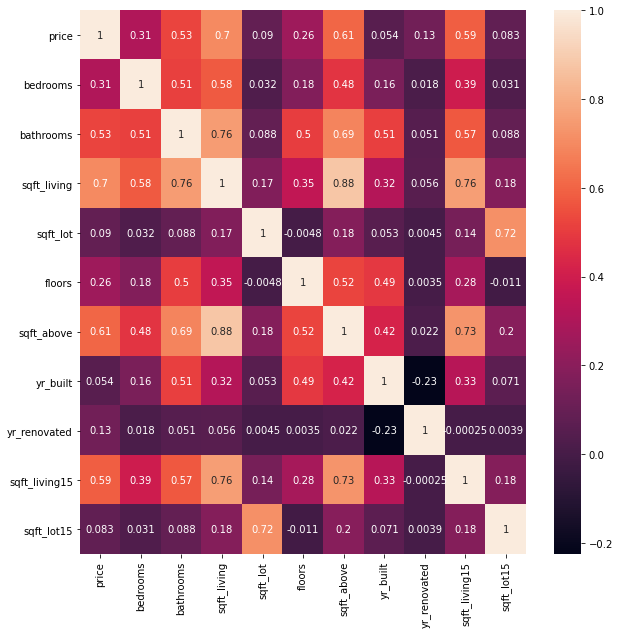

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
heat = sns.heatmap(df_2.corr(), annot = True)
plt.savefig('heat.png',bbox = 'tight')

In [18]:
df.groupby('view').mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
view,,,,,,,,,,,,,,,
AVERAGE,4780385284.15,791390.37,3.57,2.43,2650.72,22317.00,1.51,2082.94,1964.82,128.41,98090.94,47.56,-122.24,2427.34,17355.15
EXCELLENT,4998184382.95,1452465.88,3.62,2.78,3334.48,21624.01,1.61,2508.68,1965.95,329.41,98095.86,47.58,-122.26,2841.00,18881.07
FAIR,4617411098.38,813373.27,3.54,2.35,2571.05,12370.60,1.39,1935.74,1962.89,180.02,98096.39,47.58,-122.29,2407.35,10759.70
GOOD,4340826541.94,973285.20,3.67,2.67,3016.85,34877.13,1.56,2277.03,1967.39,242.76,98092.06,47.55,-122.24,2702.21,23922.74
NONE,4571527549.82,496806.07,3.35,2.07,1998.36,14156.57,1.49,1747.02,1971.62,71.87,98076.32,47.56,-122.21,1924.74,12165.80


In [21]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [19]:
condition_counts = df['condition'].value_counts()
grade_counts = df['grade'].value_counts()
renovation_counts = df['yr_renovated'].value_counts()

In [20]:
print(f'Condition value counts:\n{condition_counts}\n')
print(f'Grade value counts:\n{grade_counts}\n')
print(f'Renovation year value counts:\n{renovation_counts}\n')

Condition value counts:
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

Grade value counts:
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

Renovation year value counts:
0.00       17011
2014.00       73
2003.00       31
2013.00       31
2007.00       30
           ...  
1946.00        1
1959.00        1
1971.00        1
1951.00        1
1954.00        1
Name: yr_renovated, Length: 70, dtype: int64

